Tempo de execução sem laço FOR: 0.00376


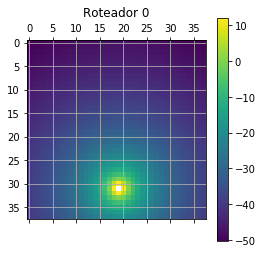

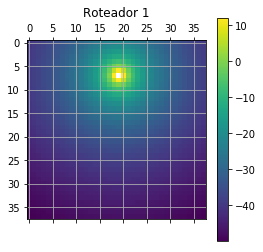

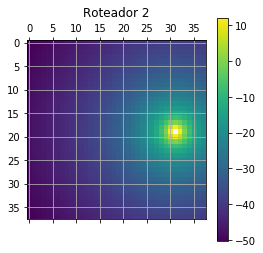

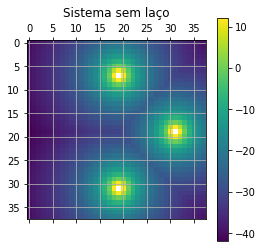

In [9]:
from collections import namedtuple
from functools import reduce
import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
import warnings                        # Método para suprimir os avisos de exceções 

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotagem
import numpy as np                     # Importa biblioteca para cálculos numéricos 

warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções 
# Ex.: divisões por zero, que neste exemplo, não são um problema.

start_time = time.clock()              # Primeira medição de tempo: inicia a contagem
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição

x, y = [np.arange(dPasso,dDim-dPasso,dPasso)]*2
X, Y = np.meshgrid(x,y)

Router = namedtuple('Router', ['x', 'y'])
routers = (
	Router(0.5, 0.8),
	Router(0.5, 0.2),
	Router(0.8, 0.5),
)

# Matrizes com posição de cada ponto do grid relativa a cada roteador
pbs = [X + 1j*Y - (router.x*dDim + router.y*dDim*1j) for router in routers]

# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
pl = [10*np.log10(1/(np.absolute(p)**4)*10e3) for p in pbs]
plf = reduce(np.maximum, pl)

stop_time = time.clock()               # Medição de tempo de execução
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = round(stop_time - start_time, 5)
# Mostra tempo de execução na tela
print("Tempo de execução sem laço FOR: "+str(tempo_de_execucao))

for i, p in enumerate(pl):
    plt.matshow(p)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
    plt.title("Roteador {}".format(i),y=1.1)
    plt.grid()                             # Adiciona as linhas horizontais e verticais
    plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)                 
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema sem laço",y=1.1)
plt.show()  